# 电信客户流失分析与预测


### 背景

关于用户留存有这样一个观点，如果将用户流失率降低5%，公司利润将提升25%-85%。如今高居不下的获客成本让电信运营商遭遇“天花板”，甚至陷入获客难的窘境。随着市场饱和度上升，电信运营商亟待解决增加用户黏性，延长用户生命周期的问题。准确预测客户流失并确定相关因素可以帮助公司制定有效的客户保留策略，从而减少客户流失。因此，电信用户流失分析与预测至关重要。


数据集源于kaggle，共有21个字段，7043条记录，每条记录包含了唯一客户的特征。包括：
* 用户流失指标：Churn
* 用户个人信息: gender、SeniorCitizen、Partner、Dependents
* 用户账户信息数据: tenure 、Contract 、PaperlessBilling、PaymentMethod、MonthlyCharges 、 TotalCharges
* 用户订阅服务数据: PhoneService、MultipleLines、InternetService 、OnlineSecurity、OnlineBackup、DeviceProtection、     TechSupport、StreamingTV 、StreamingMovies


针对以上数据，提出问题：
* 分析用户特征与流失的关系
* 从整体情况看，流失用户普遍具有哪些特征？
* 尝试找到合适的模型预测流失用户
* 针对性给出增加用户粘性、预防流失的建议

###  理解数据

In [413]:
#导入工具包

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [414]:
#读取数据集
df = pd.read_csv('/Users/lee/Desktop/Telco_Customer_Churn-master/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [415]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [316]:
df.shape

(7043, 21)

In [356]:
# 查看数据类型 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 数据清洗

In [416]:
#删除ID列 对模型预测没用
df = df.drop(['customerID'], axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [417]:
#将TotalCharges总消费额的数据类型转换为浮点型,缺失值转换为NaN
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

有11个缺失值，查看这11列缺失值数据

In [418]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


发现客户存续期全为0，由于客户还从未向公司支付任何费用，因此可以用零值填充。

In [419]:
#fill missing values 
df['TotalCharges'] = df['TotalCharges'].fillna(0)

df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [361]:
#获取数据类型的描述统计信息
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


###  数据可视化探索与分析

数据可分为数值特征数据、分类特征数据，分别进行可视化分析。

先来看看流失与留存用户占比

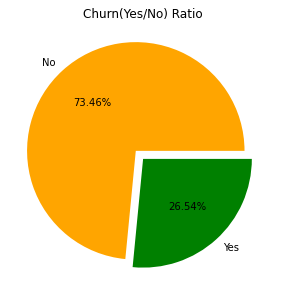

In [291]:
plt.rcParams['figure.figsize']=5,5
colors=['orange','green']
plt.pie(df['Churn'].value_counts(),labels=df['Churn'].value_counts().index,autopct='%1.2f%%', colors=colors,explode=(0.1,0))
plt.title('Churn(Yes/No) Ratio')
plt.show() 

属于不平衡数据集，流失用户占比达26.54%

### 1. 数值特征字段 

**<font style='bold'>主要包括：用户存续期tenure、月费MonthlyCharges、总费用TotalCharges </font>**

绘制核密度曲线图

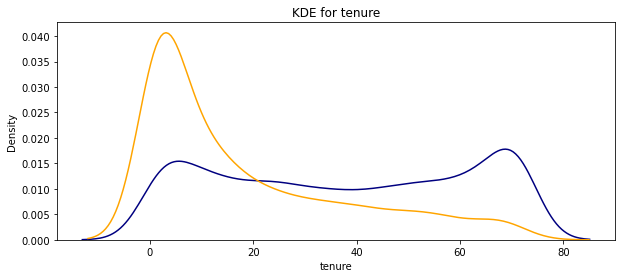

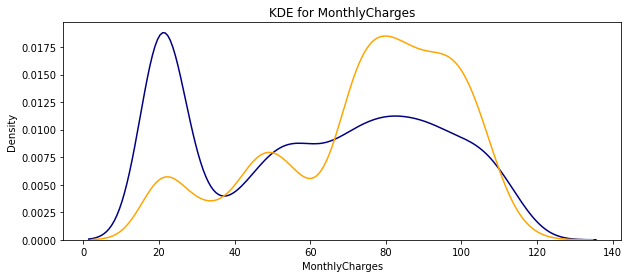

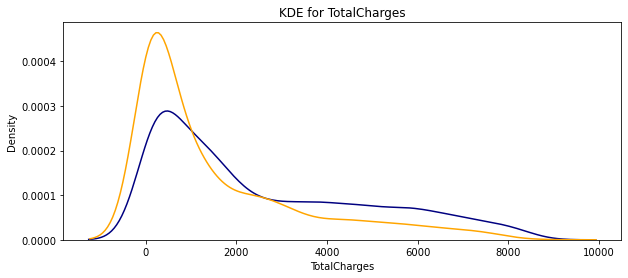

In [292]:
def kdeplot(feature):
    plt.figure(figsize=(10,4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature], color='navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature],  color='orange',label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

结论
* 1.新用户明显更容易流失，体现出维持老用户的重要性
* 2.在网时长达到3个月，流失率小于在网率，证明用户的心理稳定期一般是三个月
* 3.月费越高用户越容易流失，因此高额月费必须要伴随着更多更优质的服务，否则将导致用户流失
* 4.总费用越少越容易流失。

 后续在特征工程中将在数值特征基础上创建新的特征。

### 2. 分类特征字段（16个）


**<font style='bold'> 1.1 用户个人信息：性别gender、SeniorCitizen老年用户、Partner伴侣用户、Dependents家属用户</font>**

<AxesSubplot:xlabel='Dependents', ylabel='count'>

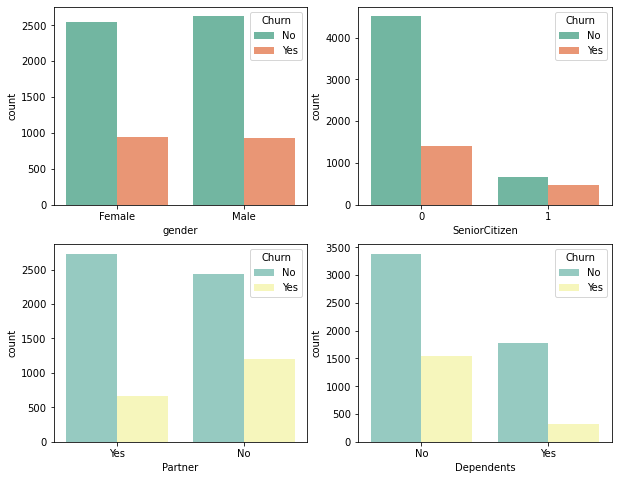

In [293]:
fig1, axes1 = plt.subplots(2,2, figsize=(10,8))
sns.countplot(x='gender', data=df, hue='Churn',palette="Set2",ax=axes1[0][0])
sns.countplot(x='SeniorCitizen', data=df, hue='Churn',palette="Set2", ax=axes1[0][1])
sns.countplot(x='Partner', data=df, hue='Churn',palette="Set3", ax=axes1[1][0])
sns.countplot(x='Dependents', data=df, hue='Churn',palette="Set3", ax=axes1[1][1])

结论：
* 1.用户流失与gender基本无关
* 2.老年用户SeniorCitizen流失比例相对大一些，可能是由于年长的用户对新生事物不感冒，抑或是和老年人死亡率高有关系
* 3.家属（Partner、Dependents）较少的用户更容易流失，家庭成员少，对通信服务需求自然就少，很好理解

**<font style='bold'>  1.2  用户订阅服务：电话服务PhoneService、多线服务MultipleLines、上网服务InternetService 、安全服务OnlineSecurity、备份服务OnlineBackup、设备安全DeviceProtection、技术支持TechSupport、在线电视StreamingTV 、在线电影StreamingMovies</font>**

1.2.1 电话、网络服务

<AxesSubplot:xlabel='InternetService', ylabel='count'>

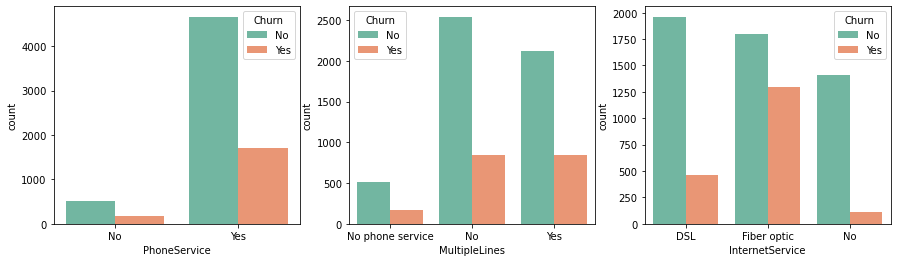

In [294]:
fig2, axes2 = plt.subplots(figsize=(15,4))
plt.subplot(131)
sns.countplot(x='PhoneService', hue='Churn',palette="Set2", data=df)
plt.subplot(132)
sns.countplot(x='MultipleLines', hue='Churn', palette="Set2",data=df)
plt.subplot(133)
sns.countplot(x='InternetService', hue='Churn',palette="Set2", data=df)

1.2.2 其他订阅服务 

[Text(0.5, 0, 'Additional Service'), Text(0, 0.5, 'Num of churns')]

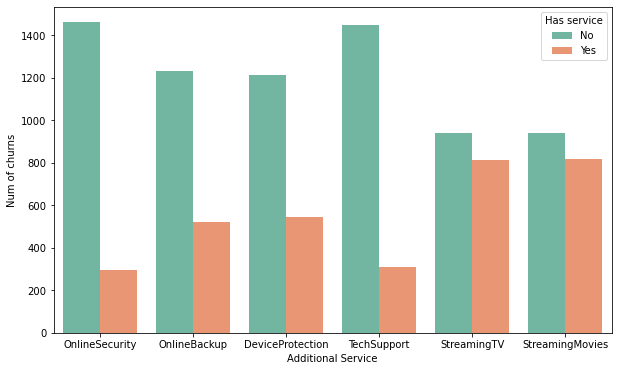

In [362]:
fig3 = plt.figure(figsize=(10,6))

cols = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
df1 = df[(df['InternetService']!='NO') & (df['Churn'] == 'Yes')]
#melt函数用于行转列
df1 = pd.melt(df1[cols]).rename({'value':'Has service'}, axis=1)

ax = sns.countplot(x= 'variable', data=df1, hue='Has service', hue_order=['No', 'Yes'],palette="Set2")
ax.set(xlabel = 'Additional Service', ylabel='Num of churns')

结论：
* 1.电话服务指标PhoneService、MultiLines似乎影响不大
* 2.网络服务指标中，采用Fiber optic服务的用户更容易流失
* 3.其他订阅服务指标中，前四项服务（OnlineSecurity、OnlineBackup、DeviceProtection、TechSupport）对用户流失作用类似，没有订阅的用户较容易流失，后两项（StreamingTV 、StreamingMovies）没有明显特征，进行特征分析时可以忽略

**<font style='bold'>  1.3 用户账单信息：合同期限Contract 、无纸化账单PaperlessBilling、付款方式PaymentMethod</font>**

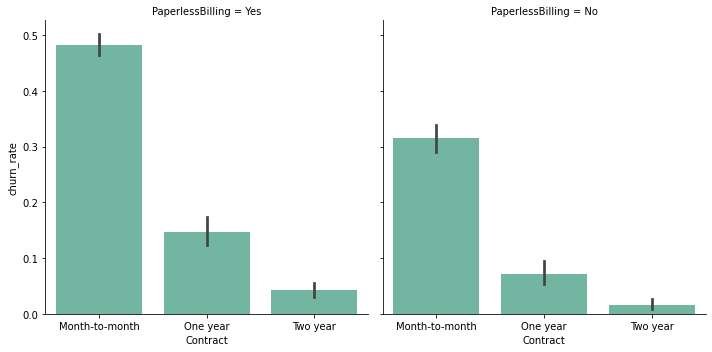

In [420]:
df['churn_rate'] = df['Churn'].replace('No', 0).replace('Yes', 1)
#FacetGrid 是一个绘制多个图表（以网格形式显示）的接口，用map映射到具体的 seaborn 图表类型
grid = sns.FacetGrid(df, col='PaperlessBilling',height=5)
ax = grid.map(sns.barplot, 'Contract', 'churn_rate', 'PaperlessBilling', palette="Set2", order=['Month-to-month','One year', 'Two year'])

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

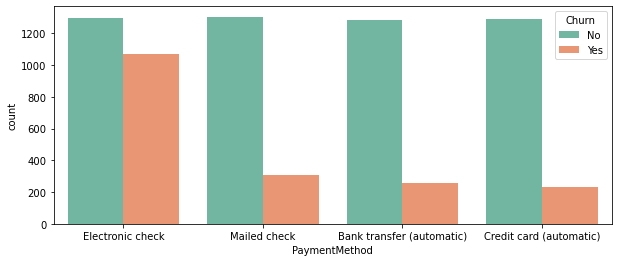

In [421]:
fig4 = plt.figure(figsize=(10,4))
plt.subplot()
sns.countplot('PaymentMethod', data=df, hue='Churn', palette="Set2")

结论：
* 1.采用无纸化账单（PaperlessBilling）的用户流失率最高，推测该方式的使用体验较为一般
* 2.合同签约期（Contract）越长的用户越不容易流失。考虑到2年以上的合同，用户如果毁约则会有一定程度的惩罚，这个条件限制了用户违约性的解约行为
* 3.电子支付（Electronic cherk）的支付方式明显更容易流失客户，也许是因为办理业务方便，因此去留比较随性。

### 相关性探索

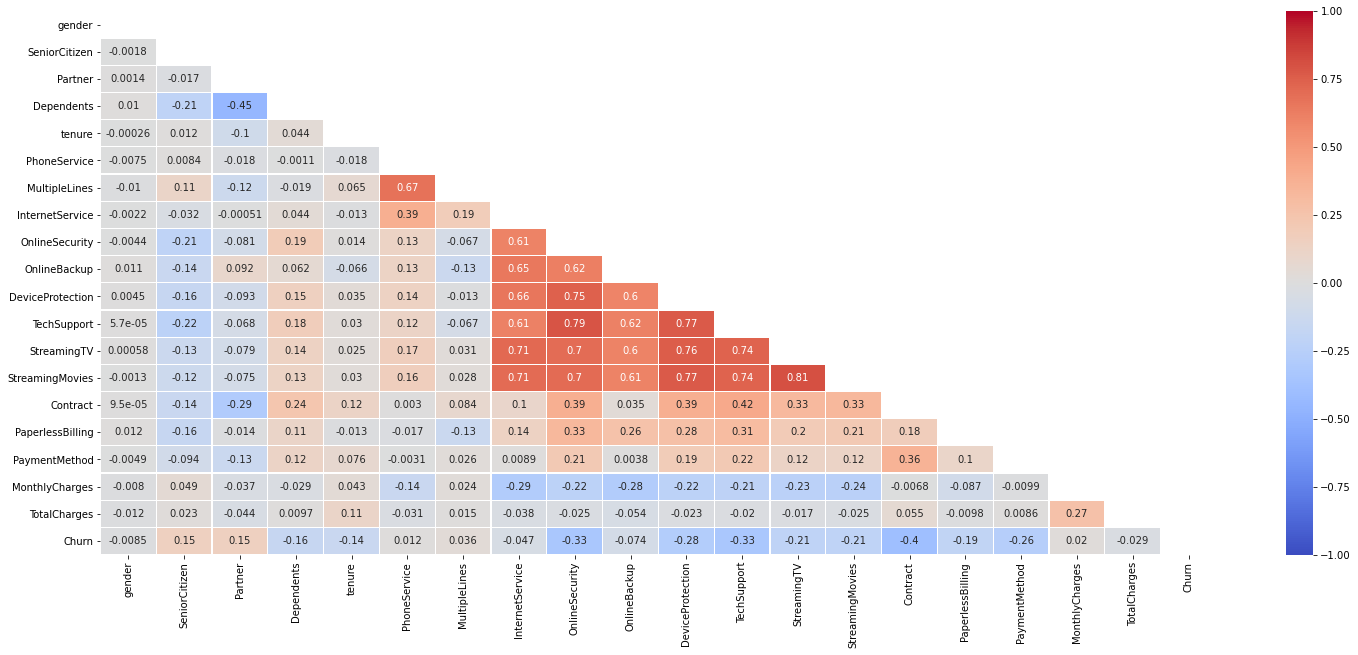

In [74]:
#plt.figure(figsize=(25, 10))
#df_corr = df.drop(['churn_rate'], axis=1, inplace=True)
#corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

#mask = np.triu(np.ones_like(corr, dtype=bool))

#ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [422]:
df.drop(["churn_rate"], axis = 1, inplace = True)

#将预测变量转换为二进制变量
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No', value=0, inplace=True)

#进行one hot encode
df = pd.get_dummies(df)

df.head() 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


### 特征工程

#### 创建新特征

In [423]:
#创建平均费用、费用比率和费用差三个新特征

df['monthly_diff_mean'] = df['MonthlyCharges'] / df['MonthlyCharges'].mean() 
df['charges_ratio'] = df['tenure']*df['MonthlyCharges'] / (df['TotalCharges'] + 1) 
df['charges_diff'] = df['TotalCharges'] - df['tenure']*df['MonthlyCharges']

#### 特征缩放

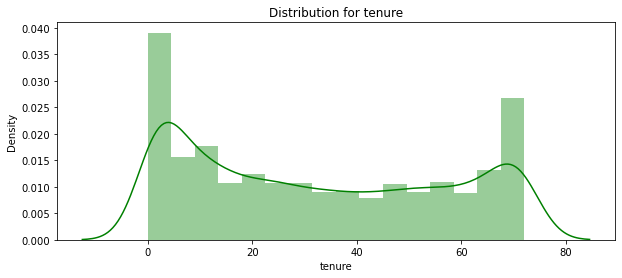

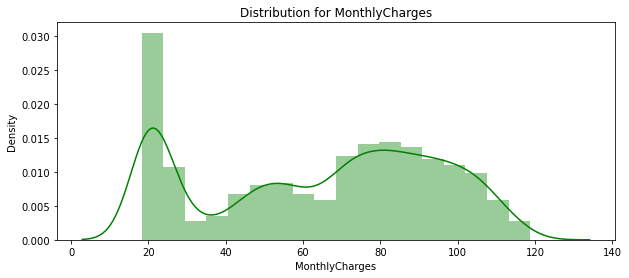

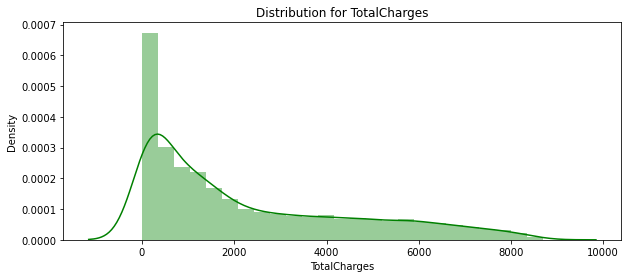

In [424]:
# 查看数值型变量分布

def distplot(feature, frame, color='g'):
    plt.figure(figsize=(10,4))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)
    
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

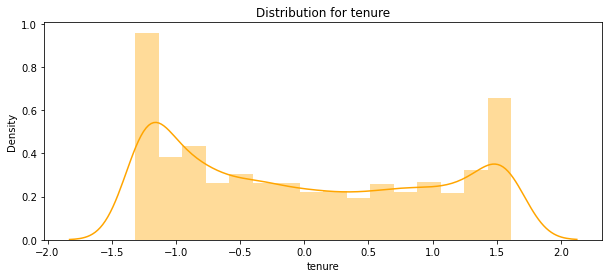

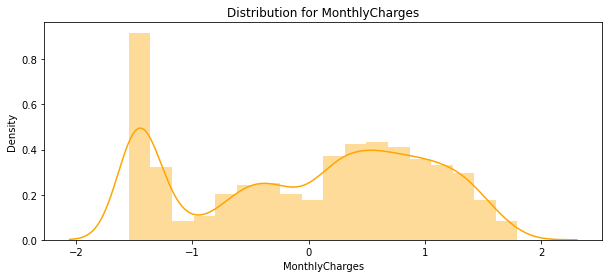

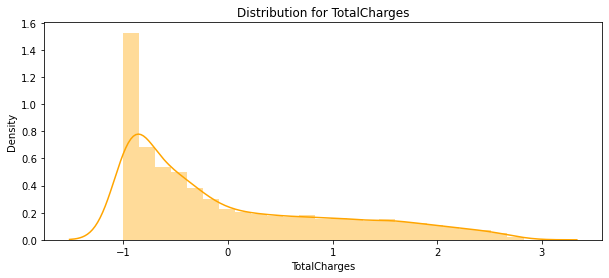

In [426]:
#最值归一化，使结果值映射到[0,1]之间 （本质作用是使得目标函数的Hessian矩阵的条件数变小，有更好的收敛性质）
# 这里使用标准化
from sklearn.preprocessing import StandardScaler

df_std = pd.DataFrame(StandardScaler().fit_transform(df[numerical_cols].astype('float64')),
                       columns=numerical_cols)
df_std = pd.DataFrame(df_std, columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='orange')   

In [369]:
df = df.drop(columns = num_cols,axis = 1)
df = df.merge(df_std, left_index=True, right_index=True, how = "left")

In [370]:
#特征筛选，为避免多重共线性问题，删除皮尔森相关性系数大于0.8的特征

threshold = 0.90
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
print(list(to_drop))

There are 13 columns to remove.
['gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'PaperlessBilling_Yes', 'MonthlyCharges']


In [371]:
df = df.drop(columns = to_drop)
df.shape

(7043, 36)

In [406]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split

# 分离特征列和预测值
X = df.drop(columns= ['Churn']) 
y = df['Churn'].values

#random_state = random.seed() 随机数种子，用于控制随机状态。若不设置此参数，则函数会自动选择一种随机模式，划分数据集得到的结果也就不同
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#### 模型选择

In [407]:
#Importing the auxiliar and preprocessing librarys
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_validate

#Models
from sklearn.cluster import KMeans
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression())])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier())]))) 
clfs.append(("KNN", 
             Pipeline([("Scaler", StandardScaler()),
                       ("KNN", KNeighborsClassifier())]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier())]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier())]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier())])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier())])))


#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'accuracy'
n_folds = 10

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv=kfold, scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  
                               cv_results.std())
    print(msg) 

LogReg: 0.803043 (+/- 0.015645)
XGBClassifier: 0.782556 (+/- 0.015915)
KNN: 0.764097 (+/- 0.018481)
DecisionTreeClassifier: 0.731034 (+/- 0.023449)
RandomForestClassifier: 0.792495 (+/- 0.020366)
RidgeClassifier: 0.801420 (+/- 0.017507)
BaggingRidgeClassifier: 0.780933 (+/- 0.013965)


In [408]:
#MODEL FUNCTION

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

def model(algorithm, X_train, y_train, 
          X_test, y_test, of_type):
    
    print ("MODEL - OUTPUT")
    algorithm.fit(X_train, y_train)
    predictions = algorithm.predict(X_test)
    
    print ("\naccuracy_score :",accuracy_score(y_test, predictions))
    
    print ("\nclassification report :\n",(classification_report(y_test, predictions)))
        
    plt.figure(figsize=(14,12))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
    plt.title("CONFUSION MATRIX",fontsize=20)
    
    predicting_probabilites = algorithm.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
    plt.subplot(222)
    plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
    plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
    plt.legend(loc = "best")
    plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
    
    if  of_type == "feat":
        
        dataframe = pd.DataFrame(algorithm.feature_importances_, X_train.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(224)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
    
    elif of_type == "coef" :
        
        dataframe = pd.DataFrame(algorithm.coef_.ravel(),X_train.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(224)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
            
    elif of_type == "none" :
        return (algorithm)

MODEL - OUTPUT

accuracy_score : 0.8059630856601988

classification report :
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1546
           1       0.67      0.54      0.60       567

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



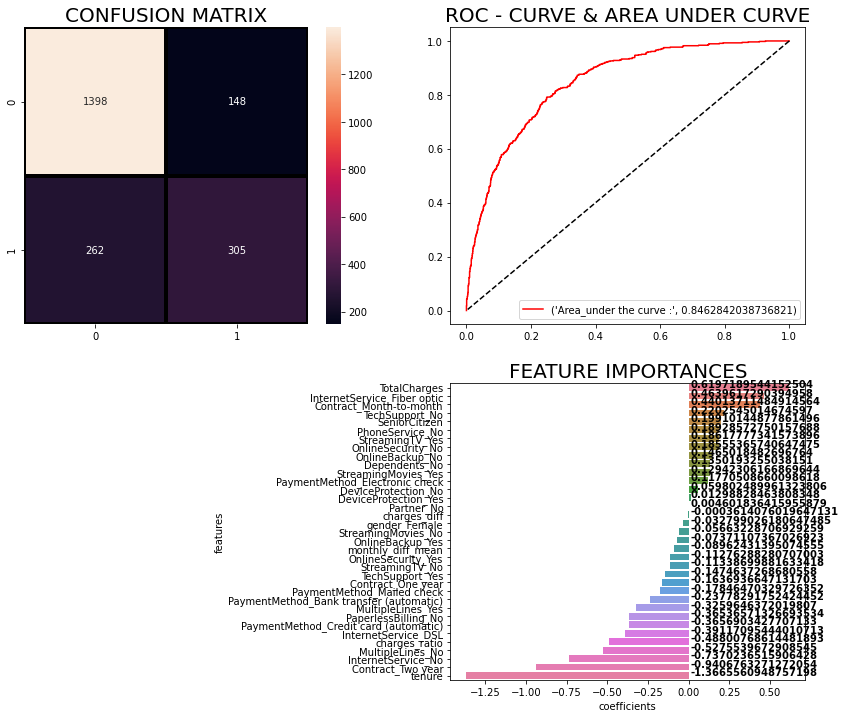

In [409]:
rf =LogisticRegression(solver = "lbfgs", multi_class = "auto")

model(rf,X_train, y_train,
      X_test, y_test, "coef")

* 1.总费用TotalCharges、按月合同Contract_Month_To_Month和fibre optic网络服务是用户流失的最关键指标
* 2.与此相反，两年合同Contract_Two_Year和用户存续期tenure是提高用户忠诚度的最重要指标

[16:11:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

accuracy_score : 0.7671557027922385

classification report :
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1546
           1       0.58      0.47      0.52       567

    accuracy                           0.77      2113
   macro avg       0.70      0.67      0.68      2113
weighted avg       0.75      0.77      0.76      2113



Text(0.5, 1.0, 'CONFUSION MATRIX')

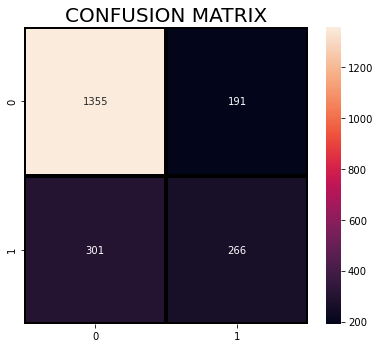

In [410]:
xgb = XGBClassifier(n_estimators=800, n_jobs=-1)

xgb.fit(X_train,y_train)
predictions = xgb.predict(X_test)

print ("\naccuracy_score :",accuracy_score(y_test, predictions))

print ("\nclassification report :\n",(classification_report(y_test, predictions)))

plt.figure(figsize=(14,12))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, predictions),
            annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("CONFUSION MATRIX",fontsize=20)

MODEL - OUTPUT

accuracy_score : 0.7828246983676366

classification report :
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      1026
           1       0.65      0.43      0.52       383

    accuracy                           0.78      1409
   macro avg       0.73      0.67      0.69      1409
weighted avg       0.77      0.78      0.77      1409



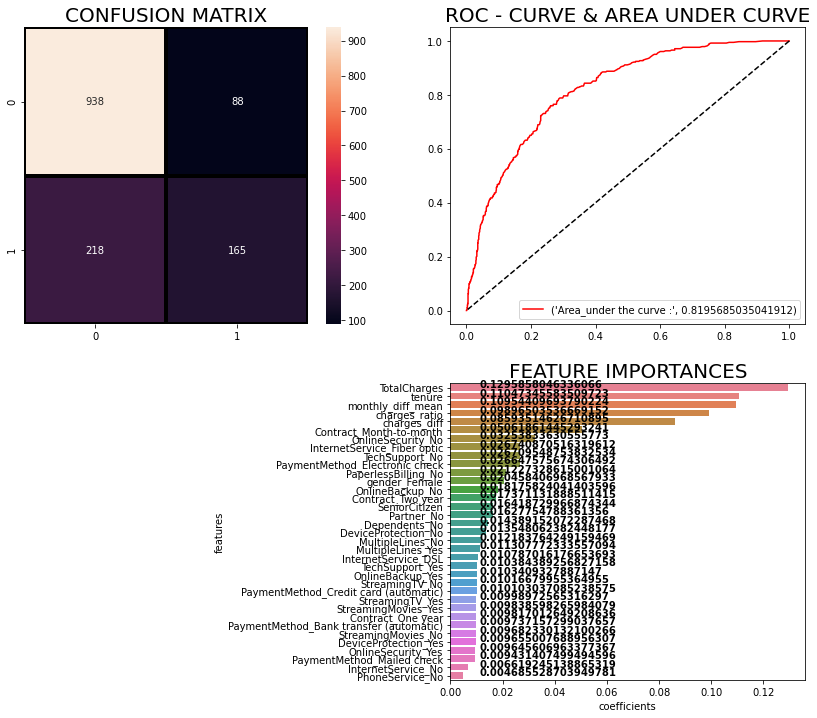

In [405]:
rf =RandomForestClassifier(n_estimators=500)

model(rf,X_train, y_train,
      X_test, y_test, "feat")

根据随机森林模型预测得到：
* 1.按月合同Contract_Month_To_Month、总费用TotalCharges以及用户存续期是导致用户流失最关键的三个因素
* 2.此外，电子支付（Electronic check）、在线服务（Online Security、技术支持（TechSupport）、fibre optic网络服务、年长用户等是导致用户流失的其他重要因素

## 结论和建议

根据以上分析，得到高流失用户的特征：
* 老年用户，未婚用户，无亲属用户更容易流失
* 在网时长小于半年，有电话服务，光纤用户/光纤用户附加流媒体电视、电影服务，无互联网增值服务
* 签订的合同期较短，采用电子支票支付，是电子账单，月租费约70-110元的客户容易流失
* 其它属性对用户流失影响较小，以上特征保持独立

针对上述结论，从业务角度给出相应的建议：
* 针对单月合同（Contract_Month_To_Month）用户，考虑推出年合同付费折扣活动或增加服务内容，引导用户签约中长期（2年以上）的合同，提高用户留存率
* 高额月费（MonthlyCharges）将造成用户流失，一方面需要权衡服务费用与用户流失，平衡二者之间关系，适当降低费用以提高用户留存率；另一方面，高额月费搭配优质服务或许能提高用户满意度，减少用户流失
* 用户存续期（tenure）是用户忠诚度的体现，针对新注册用户，推送半年优惠如赠送消费券，以渡过用户流失高峰期。
* 年长用户 （SeniorCitizen）比较容易流失，另外考虑无亲属、无伴侣用户，推出定制服务如亲属套餐、温暖套餐等，一方面加强与其它用户关联度，另一方对特定用户提供个性化服务公司需根据这部分人群的体量和利润，考虑是否减少对这部分人群的营销力度，降低营销成本
* 除Fiber optic光纤网络服务的用户更容易流失外，其他手机、网络服务指标没有明显影响
* 其他订阅服务指标中，除电视流和电影流服务外，订阅其他四项服务（OnlineSecurity、OnlineBackup、DeviceProtection、TechSupport）能减少用户流失，公司应加大对这几项服务的营销力度，可以采取赠送或者捆绑的方式
* 分析用户账单信息，采用无纸化账单的方式用户流失率明显更高。猜想，虽然无纸化账单提高了效率，但可能降低了用户体验，进而降低用户忠诚度，应适当调整采用无纸化账单的比例，并持续跟踪用户流失的情况
* 电子支付（Electronic cherk）会导致用户流失，可建议定向推送其它支付方式的优惠券，引导用户改变支付方式。